In [1]:
# imports and set up logging
import gensim 
import logging
import glob, os
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
# directory containing all source texts for training the model 
data_dir="/Users/tharsen/Desktop/corpus"

In [3]:
os.chdir(data_dir)
documents = list()
for filename in glob.glob("*.txt"):
    filedata = open(filename, 'r').read()
    print(filename + " = " + str(len(filedata)) + " chars")
    documents = documents + filedata.split(".")

1H4_h.txt = 130423 chars
1H6_h.txt = 116317 chars
2H4_h.txt = 141574 chars
2H6_h.txt = 135863 chars
3H6_h.txt = 129551 chars
Ado_c.txt = 111116 chars
Ant_t.txt = 133668 chars
AWW_c.txt = 121896 chars
AYL_c.txt = 114429 chars
Cor_t.txt = 146443 chars
Cym_t.txt = 147159 chars
Err_c.txt = 76924 chars
H5_h.txt = 141819 chars
H8_h.txt = 128223 chars
Ham_t.txt = 163429 chars
JC_t.txt = 104561 chars
John_t.txt = 112414 chars
Lear_t.txt = 140510 chars
LLL_c.txt = 115391 chars
M4M_c.txt = 116348 chars
Mac_t.txt = 91625 chars
MerchV_c.txt = 112334 chars
MND_c.txt = 88551 chars
Oth_t.txt = 141395 chars
Pericles_x.txt = 97471 chars
R2_h.txt = 120934 chars
R3_h.txt = 156881 chars
Rom_t.txt = 130885 chars
Shr_c.txt = 111364 chars
TGV_c.txt = 91686 chars
Tim_t.txt = 98749 chars
Tit_t.txt = 109892 chars
Tmp_c.txt = 88800 chars
TN_c.txt = 104476 chars
TNK_x.txt = 127691 chars
Tro_c.txt = 142635 chars
Wiv_c.txt = 115202 chars
WT_c.txt = 134528 chars


In [4]:
# Check to see that the first sentence is correct
print(documents[0])

 So shaken as we are , so wan with care , Find we a time for frighted peace to pant And breathe short-winded accents of new broils To be commenced in strands afar remote 


In [5]:
from gensim.models import word2vec, Phrases
from gensim.models.phrases import Phraser

#documents = ["the mayor of new york was there", "human computer interaction and machine learning has now become a trending research area","human computer interaction is interesting","human computer interaction is a pretty interesting subject", "human computer interaction is a great and new subject", "machine learning can be useful sometimes","new york mayor was present", "I love machine learning because it is a new subject area", "human computer interaction helps people to get user friendly applications"]

sentence_stream = [doc.split(" ") for doc in documents]

trigram_sentences_project = []

#bigram = Phrases(sentence_stream, min_count=1, delimiter=b' ')
#trigram = Phrases(bigram[sentence_stream], min_count=1, delimiter=b' ')
#bigram = Phrases(sentence_stream, min_count=1, delimiter=b' ', threshold=2)
#trigram = Phrases(bigram[sentence_stream], min_count=1, delimiter=b' ') #, threshold=3

bigram = Phraser(Phrases(sentence_stream))
trigram = Phraser(Phrases(bigram[sentence_stream]))

for sent in sentence_stream:
    bigrams_ = bigram[sent]
    trigrams_ = trigram[bigram[sent]]
    trigram_sentences_project.append(trigrams_)

# Set values for various parameters
num_features = 200    # Word vector dimensionality                      
min_word_count = 1    # Minimum word count                        
num_workers = 20      # Number of threads to run in parallel
context = 5           # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words


model = word2vec.Word2Vec(trigram_sentences_project, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

vocab = list(model.wv.vocab.keys())
print(vocab[:10])


2019-06-03 15:30:35,369 : INFO : collecting all words and their counts
2019-06-03 15:30:35,370 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-06-03 15:30:35,778 : INFO : PROGRESS: at sentence #10000, processed 205010 words and 101389 word types
2019-06-03 15:30:36,150 : INFO : PROGRESS: at sentence #20000, processed 403566 words and 170975 word types
2019-06-03 15:30:36,526 : INFO : PROGRESS: at sentence #30000, processed 591367 words and 228093 word types
2019-06-03 15:30:36,925 : INFO : PROGRESS: at sentence #40000, processed 790645 words and 281402 word types
2019-06-03 15:30:37,269 : INFO : PROGRESS: at sentence #50000, processed 981628 words and 329496 word types
2019-06-03 15:30:37,407 : INFO : collected 347201 word types from a corpus of 1056753 words (unigram + bigrams) and 54148 sentences
2019-06-03 15:30:37,408 : INFO : using 347201 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>
2019-06-03 15:30:37,409 : I

2019-06-03 15:31:01,693 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-06-03 15:31:01,703 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-06-03 15:31:01,711 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-06-03 15:31:01,714 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-06-03 15:31:01,719 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-06-03 15:31:01,731 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-06-03 15:31:01,735 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-06-03 15:31:01,736 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-06-03 15:31:01,739 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-06-03 15:31:01,743 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-06-03 15:31:01,745 : INFO : worker thread finished; awaiting finish of 5 more t

['So', 'shaken', 'as', 'we_are', ',', 'so', 'wan', 'with', 'care', 'Find']


In [267]:
# Print the total number of items in our model's vocabulary
print(len(model.wv.vocab))

34965


In [268]:
w1 = "king"
model.wv.most_similar (positive=w1)

2019-02-11 14:48:15,486 : INFO : precomputing L2-norms of word weight vectors


[('gentleman', 0.9454977512359619),
 ('maid', 0.9449328780174255),
 ('child', 0.931004524230957),
 ('fellow', 0.9295815229415894),
 ('fault', 0.9224992990493774),
 ('case', 0.9197366237640381),
 ('threadbare', 0.9118105173110962),
 ('young', 0.9111688137054443),
 ('dog', 0.9110386371612549),
 ('prince', 0.9039336442947388)]

In [269]:
w1 = "lady"
model.wv.most_similar (positive=w1)

[('boy', 0.9479358196258545),
 ('master', 0.9403353929519653),
 ('lord', 0.934485673904419),
 ('fellow', 0.9323917627334595),
 ('brother', 0.9322241544723511),
 ('son', 0.9321994781494141),
 ('daughter', 0.9275787472724915),
 ('friend', 0.9243905544281006),
 ('wife', 0.923072099685669),
 ('husband', 0.9228538274765015)]

In [270]:
w1 = "death"
model.wv.most_similar (positive=w1)

[('life', 0.9239870309829712),
 ('honor', 0.9152224063873291),
 ('sorrow', 0.9139392375946045),
 ('beauty', 0.9132205247879028),
 ('fortune', 0.9071530699729919),
 ('virtue', 0.9049279689788818),
 ('grace', 0.8995459079742432),
 ('state', 0.8992392420768738),
 ('light', 0.8976709842681885),
 ('law', 0.8937926292419434)]

In [271]:
print(model.wv.relative_cosine_similarity("lady","lord",topn=10))
print(model.wv.relative_cosine_similarity("lady","meal",topn=10))
# From the gensim documentation: "For WordNet synonyms, if rcs(topn=10) is greater than 0.10 
# then wa and wb are more similar than any arbitrary word pairs."

0.10029395571610536
0.06176809774927151


In [272]:
# analogies -- this example asks:
# "she" is to "sings" as "he" is to ...   (analogies are often written like this: "she:sings::he:?")
model.wv.most_similar(positive=['she','sings'],negative=['he'])

[('weeps', 0.9383993148803711),
 ('lively', 0.9343416094779968),
 ('purged', 0.933335542678833),
 ('plays', 0.9290236234664917),
 ('talks', 0.9243598580360413),
 ('stabbed', 0.9229390621185303),
 ('began', 0.9221399426460266),
 ('attaint', 0.9214203357696533),
 ('treads', 0.9203882217407227),
 ('sits', 0.9200345277786255)]

In [273]:
model.predict_output_word(["I","do","love"], topn=30)

[('do', 0.003717764),
 ('think', 0.003693466),
 ('thee', 0.0036249887),
 ('would', 0.0032487833),
 ('believe', 0.0031791634),
 ('If', 0.0031616038),
 ('know', 0.0030857706),
 ('can', 0.0021131453),
 ('might', 0.0020487302),
 ('cannot', 0.0016657811),
 ('love', 0.0016570459),
 ('if', 0.0015760583),
 ('myself', 0.0015052943),
 ('not', 0.0014749805),
 ('remember', 0.0014533957),
 ('confess', 0.0012912696),
 ('understand', 0.0012864495),
 ('wish', 0.0012587492),
 ('swear', 0.0012058887),
 ('intend', 0.0011748188),
 ('as', 0.0010575339),
 ('dare_not', 0.0010516727),
 ('should', 0.001024504),
 ('I_am_sorry', 0.0010206674),
 ('so_much', 0.0010177927),
 ('heard', 0.001006842),
 ('As', 0.0009884691),
 ('repent', 0.0009536792),
 ('dare', 0.00092651276),
 ('entreat', 0.0009140744)]

In [7]:
from nltk.cluster import KMeansClusterer
import nltk
 
from sklearn import cluster
from sklearn import metrics

X = model[model.wv.vocab]

NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
 
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

/Users/tharsen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


[1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 

commends:2
general:2
action:2
brain:2
lady’s:2
fan:2
Is_there:0
besides:2
ninth:2
set_forward:1
pagan:0
infidel:0
sincerity:2
heart:2
open:2
proceedings:2
divide:2
buffets:2
moving:2
dish:2
skim:2
milk:2
honorable:2
Hang_him:0
prepared:1
Kate:0
within:2
these_two:2
fortnight:2
been:1
woman:0
Harry’s:2
Tell_me:0
Thy:2
stomach:1
golden:2
Why_dost_thou:0
bend:2
thine_eyes:2
often:2
sit’st:0
fresh:2
cheeks:2
treasures:2
rights:2
thick-eyed:2
musing:2
curst:2
slumbers:2
watched:1
murmur:2
tales:2
iron:2
wars:2
bounding:2
steed:2
Cry:0
Courage:2
field:2
sallies:2
retires:2
trenches:2
tents:2
palisadoes:2
frontiers:2
parapets:2
basilisks:2
cannon:2
culverin:2
prisoners’:2
slain:0
currents:2
heady:2
bestirred:1
beads:2
sweat:2
stood:2
bubbles:2
late-disturbèd:2
stream:2
thy_face:2
strange:2
motions:2
appeared:2
Such_as:2
restrain:2
breath:2
sudden:2
hest:2
portents:2
ho_!:0
Gilliams:0
packet:2
Butler:2
sheriff:2
One:0
even_now:2
roan:2
crop-ear:2
throne:2
Esperance:0
park:2
What_say’st_thou:0


zeal:2
Swore:2
assistance:2
performed:2
barons:2
Perceived:2
less:2
cap:2
Met:2
boroughs:2
cities:2
villages:2
Attended:2
bridges:2
lanes:2
Laid:2
gifts:2
proffered:2
Gave:2
heirs:2
pages:2
Steps:2
higher_than:2
Made:2
naked:2
reform:1
edicts:2
strait:2
decrees:2
too_heavy:2
Cries:2
seems:2
weep:1
country’s:2
justice:2
angle:2
Proceeded:1
favorites:2
absent:2
left_behind:2
personal:2
deprived:2
tasked:2
worse:2
suffered:2
owner:2
placed:2
Disgraced:0
victories:2
Sought:2
entrap:2
intelligence:2
Rated:2
board:2
dismissed:2
Broke:2
committed:2
conclusion:2
drove:2
seek:1
Too:0
indirect:2
continuance:2
withdraw:1
impawned:1
safe:1
return_again:1
accept:1
maybe:2
Hie:0
Sir:0
Michael:0
brief:0
wingèd:2
Marshal:2
To_whom:0
directed:1
How_much:0
guess:1
tenor:2
ten_thousand:2
bide:2
quick-raisèd:2
Meets:2
proportion:2
Glendower’s:1
sinew:2
o’erruled:2
too_weak:2
wage:2
an_instant:2
trial:2
warriors:2
special:2
warlike:2
corrivals:2
Doubt:0
no_less:2
needful:2
prevent:1
Dismiss:0
visit:1
confe

perverse:1
haps:1
wonted:2
dissension:2
preferreth:2
provoked:0
offends:0
incensed:0
the_Duke:0
because:1
engenders:2
thunder:2
accusations:1
lordly:2
imperious:2
another’s:2
Am_I:0
saucy:2
?_Yes:0
useth:2
patronage:2
Unreverent:0
Touching:2
spiritual:2
Roam:1
forbear:2
Bishop:2
belongs:1
his_Lordship:0
humbler:1
fitteth:2
plead:2
touched:2
so_near:2
State:2
unhallowed:2
his_Grace:2
fling:2
Uncles:2
watchmen:2
amity:2
scandal:1
peers:2
jar:2
Believe_me:0
can_tell:0
Civil:2
viperous:2
worm:2
gnaws:2
tumult:2
’s:2
uproar:2
Begun:1
Bishop’s:2
Pity:2
Gloucester’s:2
Forbidden:2
filled:2
pebble:2
banding:2
pelt:2
so_fast:0
one_another’s:2
knocked:2
windows:2
compelled:2
shops:2
ourself:1
slaught’ring:2
mitigate:2
forbidden:2
resolute:0
household:2
unaccustomed:2
upright:2
Inferior:2
his_Majesty:2
commonweal:2
disgracèd:1
inkhorn:2
parings:2
persuade:1
discord:2
afflict:0
Lord_of_Winchester:0
sighs:2
relent:1
prefer:1
Yield:2
obstinate:2
repulse:2
destroy:1
Hath_been:0
enacted:2
enmity:2
thir

Has:0
rabbit:0
Althea’s:0
dream:1
Instruct:0
Althea:0
firebrand:1
crown’s:2
interpretation:2
preserve:1
your_Grace’s:2
Delivered:2
Martlemas:0
bodily:2
immortal:2
moves:1
wen:1
John_Falstaff:1
he_has:2
kin:0
spilt:2
conceive:1
borrower’s:2
Japheth:1
greeting:2
certificate:0
Romans:2
brevity:2
commend:1
misuses:0
he_swears:2
Nell:0
Repent:1
Thine:2
usest:0
familiars:2
sisters:0
steep:2
no_worse:0
mock:1
sups:0
boar:2
frank:2
Ephesians:0
Sup:1
?_None:2
gentlewoman:0
kinswoman:0
heifers:2
govern:2
Saint_Albans:2
Put_on:2
leathern:2
jerkins:2
aprons:2
descension:0
Jove’s:2
’prentice:2
everything:2
Follow_me:0
visage:2
troublesome:2
guide:2
for_God’s_sake:0
endeared:1
your_own:2
Threw:2
stay_at_home:1
son’s:2
brighten:1
vault:2
dress:2
thick:2
blemish:0
Became:2
tardily:1
perfection:2
copy:2
Second:0
unseconded:1
look_upon:1
hideous:2
disadvantage:2
abide:1
defensible:2
precise:2
Beshrew:1
lamenting:2
oversights:2
provided:1
commons:2
rib:2
stronger:2
length:2
remembrance:2
sprout:2
recorda

an_heir:2
Philippa:2
Anne:0
eldest:2
My_mother:0
Married:0
Sole:0
Succeed:2
claims:2
Lionel’s:2
flourishes:2
slips:2
birthright:2
heart-blood:2
Beaufort’s:2
crew:2
snared:2
seeking:1
assures:1
Neville:1
Cobham:2
adjudged:2
Despoilèd:2
days’:2
penance:0
Stanley:0
Isle:2
Man:2
judged:0
justify:1
condemns:2
Mine_eyes:0
solace:2
mine_age:2
ambitiously:1
pulls:2
raught:2
sprays:2
youngest:0
appellant:2
defendant:2
armorer:2
purposely:2
Left:2
I’:0
bestead:2
charneco:2
Drink:0
prentices:2
draft:2
apron:1
Thump:0
thump:1
Masters:0
instigation:2
touching:2
downright:2
Alarum:0
thy_master’s:2
mine_enemies:2
wrongfully:0
brightest:2
evermore:2
nipping:0
abound:2
fleet:2
Ten:0
punished:0
duchess:2
Uneath:1
tender-feeling:2
abrook:2
gazing:2
erst:2
chariot:2
wheels:2
tearstained:1
nod:0
their_heads:2
closet:2
pent:2
ban:2
thine_enemies:2
Forget:1
Mailed:2
rabble:2
deep-fet:0
advisèd:2
Trowest:0
enjoys:2
Sometimes:2
pointing-stock:2
follower:2
mild:0
ax:2
hateth:1
hates:1
bushes:0
prevention:2
aime

embassade:1
brotherly:1
exceeds:2
impose:2
resist:1
Rivers:0
misfortune:2
hinder:1
life’s:2
wean:2
offspring:2
misfortune’s:2
blood-sucking:2
Guess:2
tyrant’s:2
sanctuary:2
thicket:2
disport:1
advertised:1
usual:2
huntsmen:2
requireth:2
Lynn:1
shipped:0
Flanders:2
guessed:1
Huntsman:2
go_along:1
shield:2
captive:2
fees:2
Subjects:2
sov’reigns:1
encagèd:1
Conceive:0
notes:2
sett’st:0
thwarting:0
avoiding:2
Adjudged:2
laurel:2
sin’s:2
Creator’s:2
consents:2
pronounced:2
confiscate:2
determinèd:0
eclipsed:0
Richmond:2
Suggest:2
divining:2
framed:2
wield:2
Likely:2
escapèd:2
Unsavory:0
ambush:2
presaging:2
misgive:1
conflicts:1
thus_far:1
maketh:2
amends:2
interchange:2
wanèd:2
re-passed:0
desirèd:0
arrived:0
Haven:2
threshold:2
foretold:1
lurks:2
abodements:0
forewarnèd:1
mayor:0
opened:2
good_old_man:2
Montgomery:0
fare_you:0
Drummer:0
If_you’ll:0
scrupulous:2
fearless:2
soonest:2
bruit:2
speaketh:0
&c:2
gainsays:0
border:0
horizon:0
froward:0
Belgia:0
Germans:0
Hollanders:2
rivers:2
tru

dar’st:0
Dercetus:2
haters:2
pleasest:0
Splitted:0
persisted:2
taints:2
Waged:2
rarer:2
mirror’s:2
Diseases:2
declining:2
design:2
Friend:0
kindle:2
Unreconciliable:0
equalness:1
meeter:1
Confined:2
preparedly:1
gods_preserve:1
Gallus:1
proceeded:2
writings:2
shackles:0
bolts:2
palates:2
dung:2
mean’st:0
beggar:2
No_less:2
fall’n_into:2
reference:2
flows:2
dependency:2
fortune’s:2
doctrine:2
Guard:2
Relieved:2
languish:2
undoing:2
acted:1
Worth:2
pinioned:1
chastised:2
varletry:2
censuring:2
waterflies:2
Blow:2
abhorring:2
pyramides:2
gibbet:2
extend:1
Assuredly:0
an_emperor:2
Crested:2
propertied:2
tunèd:2
spheres:2
quail:2
autumn:2
reaping:2
dolphin-like:2
Walked:2
crownets:2
islands:2
plates:2
vie:2
Condemning:2
answering:2
rebound:1
smites:2
Arise:0
laden:2
frailties:2
shamed:0
thereon:2
rely:1
scutcheons:1
exactly:2
Seleucus:0
treasurer:2
estates:1
hired:2
Slave:0
soulless:0
vouchsafing:0
Doing:2
lordliness:1
Parcel:2
Addition:0
trifles:2
Immoment:0
modern:2
Livia:2
induce:2
unfol

trusts:1
foxes:2
coal:2
hailstone:2
subdues:2
Deserves:0
fins:2
hews:2
oaks:2
senate:2
stored:2
Capitol:0
thrives:2
declines:2
Conjectural:2
marriages:2
feebling:2
Below:2
cobbled:2
ruth:2
quarry:2
quartered:2
abundantly:2
dissolved:2
an-hungry:0
Corn:0
shreds:2
complainings:2
generosity:2
Shouting:2
tribunes:2
One’s:2
Junius:2
Sicinius:0
Velutus:2
’Sdeath:0
unroofed:2
themes:2
insurrection’s:2
arguing:1
Volsces:2
elders:2
Tullus:2
Aufidius:0
envying:2
Cominius:0
Titus_Lartius:0
Tullus’:2
priority:0
homes:2
garners:2
Worshipful:2
mutineers:2
Bemock:0
Tickled:2
disdains:2
treads:2
miscarries:0
demerits:2
Cominius’:2
singularity:2
Whatever:0
circumvention:1
army’s:2
pretenses:2
veiled:1
hatching:2
Corioles:2
They’ve:2
freelier:0
embracements:2
tender-bodied:2
comeliness:2
kings’:2
considering:1
picture-like:1
sprang:1
man-child:2
voluptuously:2
Valeria:0
Beseech_you:0
shunning:1
mailed:2
wiping:0
harvestman:2
Hecuba:0
suckle:2
lovelier:2
Hector’s:2
contemning:2
Aufidius’:2
housekeepers:0

hanging’s:0
prone:2
verier:0
jailers:0
gallowses:0
Preservers:2
Stepped:2
Bow:2
Companions:2
Greet:2
Affected:2
Abhorred:0
scorpion:1
Ta’en:2
mineral:2
tendance:2
adoption:2
in_despite:2
hatched:2
com’st:2
razed:2
threatened:2
Roman’s:2
peculiar:2
ransomed:2
nurselike:0
Fitting:0
Bitter:0
shuffle:2
ey’st:0
Creatures:2
Winnow:2
unspoken:2
Quail:2
Renew:2
Strive:0
rar’st:0
laming:2
straight-pight:2
Minerva:2
Postures:2
Loves:2
wiving:2
Fairness:2
trulls:2
Proved:2
unspeaking:2
sots:2
Pieces:2
Post:0
operate:2
simular:2
averring:2
chamber-hanging:2
bracelet:0
Whereupon:1
Egregious:0
justicer:0
torturers:2
abhorrèd:2
villainlike:0
sacrilegious:0
Spit:0
mire:2
gav’st:2
Dangerous:2
confection:1
Cornelius:0
very_oft:1
importuned:1
pretending:2
dreading:1
dullard:0
foamed:2
incivil:2
princelike:0
Bind:2
merited:1
danger’s:2
Assumed:0
nursing:1
Nursing:0
Beaten:2
Excited:2
sweet’st:2
benediction:2
covering:2
inlay:2
lapped:2
probation:2
Rejoiced:2
worlds:2
Continued:1
abridgment:2
Distinction:1

determinate:0
advertise:1
legitimate:1
dowager:2
mazed:2
considerings:2
aired:1
gladded:0
issue’s:0
throe:0
hulling:2
Lincoln:2
daring’st:1
summons:2
Unsolicited:2
allegèd:2
primest:2
paragoned:2
adjourn:1
Meanwhile:1
cardinals:2
dilatory:2
well-belovèd:2
Cranmer:2
Orpheus:2
mountaintops:2
Everything:0
sweet_music:2
hoods:2
monks:2
Tanta:2
erga:2
mentis:2
integritas:2
regina:0
serenissima:0
willing’st:2
absolved:1
blesses:2
Zeal:0
Forgetting:0
Offers:0
friendless:0
churchmen’s:2
heav’n:0
superstitious:2
rewarded:1
flatteries:2
angels’:2
Shipwracked:0
flourished:2
seemly:1
Remembrance:1
father-in-law:0
uncontemned:1
Strangely:0
tangled:0
Bullen:0
perceives:2
Trace:2
unrecounted:2
memorized:0
Digest:2
wasps:2
unhandled:2
incense:2
colleges:2
Shortly:1
published:0
Cranmer’s:2
archbishop:2
unseal:0
Bullens:1
Speedily:1
knight’s:2
spleeny:0
Lutheran:0
hard-ruled:2
arch-one:0
crawled:0
master-cord:2
accumulated:2
Stops:2
postures:1
Papers:2
unwittingly:0
stuffs:2
outspeaks:2
Possession:2
Dwe

urgèd:2
well-noted:2
disfigurèd:2
Startles:2
excusing:2
new-crowned:1
overbear:1
endue:0
Bend:1
Counts:1
mortality’s:2
shears:1
Bad:0
clears:2
rumor’s:2
Aloft:1
clergymen:2
fantasied:1
rumors:2
From_forth:2
harsh-sounding:2
Ascension:2
Foreknowing:0
Imprison:0
Bigot:0
new-enkindled:2
foreigners:2
invasion:2
sprightful:2
beldams:0
hearer’s:0
smith:2
slippers:1
Told:2
embattlèd:2
ranked:2
artificer:2
urgest:1
twixt:2
Hadst:0
Quoted:0
signed:0
endearèd:0
consequently:2
fleshly:2
Hostility:2
exteriorly:2
Edmundsbury:2
Melun:0
dispossessed:1
bestainèd:2
where’er:2
precious-princely:2
bloodiest:2
wildest:2
wall-eyed:2
staring:2
unbegotten:2
Exampled:2
Kneeling:2
murderer’s:2
sword’s:2
toasting-iron:1
traded:2
savors:2
boundless:2
twisted:2
stifle:2
embounded:2
scamble:2
unowed:2
proud-swelling:2
bare-picked:2
bone:2
snarleth:2
sick-fall’n:2
cincture:2
inflamed:2
inundation:2
mistempered:2
Rests:2
convertite:0
casket:2
droop:1
Threaten:2
threat’ner:2
glister:2
intendeth:2
inglorious:0
fair-pl

china:2
great-bellied:1
Master_Froth:1
Elbow’s:0
Hallowmas:2
All-hallond:0
Bunch:2
Grapes:0
Russia:2
longest:2
Froth:0
Constable’s:0
Varlet:2
Iniquity:2
Overdone:0
taphouse:2
Bum:2
bum:2
beastliest:1
geld:2
splay:2
drabs:2
heading:2
carman:0
provost:0
die_tomorrow:0
Repented:2
fornicatress:0
Condemn:2
fault’s:2
Maiden:0
deputed:2
marshal’s:2
judge’s:2
kitchens:1
remissness:2
new-conceived:2
giant’s:0
Merciful:0
unwedgeable:2
gnarlèd:2
Dressed:2
essence:1
Plays:2
avised:0
Bribe:0
sicles:2
tested:2
sunrise:2
preservèd:2
temptation:1
tempter:1
Thieves:0
goad:2
Bound:0
hollowly:2
offenseful:2
Mutually:0
Showing:2
Benedicite:2
respites:2
Anchors:2
dispossessing:2
well-wished:2
Falsely:2
restrainèd:2
pose:1
uncleanness:2
granting:1
enshield:2
Accountant:0
all-binding:2
cheaper:0
redeeming:2
Ignomy:0
Lawful:0
sliding:2
Owe:2
prints:0
warrants:2
destined:2
Sign:1
unsoiled:0
austereness:2
overweigh:1
nicety:2
prolixious:2
Redeem:2
o’erweighs:0
Bidding:2
Hooking:1
prompture:2
Angelo’s:0
Servile:

Commended:1
Dionyza:2
relating:2
digs:2
Throws:2
mischief’s:1
Riches:2
jetted:2
adorned:2
inventions:2
nuzzle:1
Plenty’s:2
prosperities:2
Taking:2
favorers:2
him’s:2
ground’s:2
halfway:1
benign:2
mite:2
Thinks:0
speken:0
Build:2
Helicane:0
killen:2
prince’:2
Thunder:2
deeps:2
perishen:2
pelf:2
escapend:2
Pilch:0
nets:2
Patchbreech:0
stirr’st:0
wanion:2
welladay:1
porpoise:0
bounced:0
a-land:0
misers:1
tumbles:0
driving:2
mouthful:2
whales:2
steeple:0
belfry:2
Simonides:0
drones:2
finny:2
recollect:2
asks:0
quotha:0
moreo’er:2
puddings:2
flapjacks:0
craver:1
Pentapolis:2
joust:2
tourney:0
Bots:0
now’s:0
’ee:0
seams:2
condolements:0
vails:2
clothed:2
bases:2
a_pair:2
gat:2
merit’s:2
renowns:1
Lux:2
tua:2
vita:2
mihi:2
motto:2
Pue:2
per:2
doleera:2
kee:2
forsa:2
pompae:2
provexit:2
apex:2
alit:2
extinguit:0
touchstone:2
Sic:2
spectanda:2
fides:2
hac:2
spe:2
vivo:2
whipstock:2
furnishèd:2
Opinion’s:1
framing:2
artist:0
glads:2
Envies:1
Time’s:2
countervail:2
Thaisa:0
standing-bowl:1
Bereft

nostra:2
casa:2
molto:2
honorato:2
signor:2
mio:2
’leges:0
pip:1
Grumio’s:0
this’:0
maze:2
Petruchio’s:0
Florentius’:2
Sibyl:2
Socrates’:2
Xanthippe:2
Affection’s:2
Adriatic:2
wealthily:1
aglet-baby:2
Minola:2
Katherina:0
Suitors:1
liberality:2
Beloved:1
assisting:1
daunt:1
’larums:2
clang:1
presumes:0
contributors:1
chiders:1
Leda’s:2
out-talk:2
first’s:0
Achieve:2
quaff:2
motion’s:0
bondmaid:2
Unbind:2
jested:1
Litio:0
petitioners:0
Bacare:0
Cambio:0
decreased:1
widowhood:1
leases:2
proud-minded:1
lutes:1
Frets:0
pillory:2
fiddler:2
twangling:2
uttereth:2
super-dainty:2
Kates:2
movable:1
Asses:0
buzzard:2
slow-winged:0
turtle:1
wasp:0
combless:2
askance:1
entertain’st:0
twig:2
hazelnuts:2
kernels:2
Conformable:0
Grissel:2
Lucrece:2
incredible:1
vied:2
protesting:2
twink:2
meacock:2
curstest:2
lookèd:1
Youngling:1
Graybeard:0
Skipper:0
flourisheth:2
Basins:2
ewers:2
counterpoints:2
Turkey:2
bossed:2
Valance:2
needlework:2
Pewter:2
milch-kine:2
Marcellus’:2
galliasses:2
off’rest:0
outv

masoned:2
turrets:2
girths:2
Youngest:2
streamer:1
corrector:0
Shaker:2
o’er-rank:2
heal’st:2
cur’st:2
auspiciously:2
blend:1
fiercest:2
eye-glance:2
Stale:2
Add’st:2
huntress:2
kenned:0
confessors:2
eighty:1
brided:2
screwed:2
Torturing:2
globy:2
Believed:0
rejoicer:1
Truer:1
ninety:2
reign’st:2
Abandoner:2
wind-fanned:2
Allow’st:2
order’s:1
scurrile:2
Seasoned:2
bride-habited:2
maiden-hearted:2
unsentenced:1
pretenders:2
advances:2
unplucked:1
dischargest:2
half-persuaded:2
half-hour:2
ipso:2
facto:2
cozens:2
lisps:2
miller’s:2
stool-ball:2
Threats:0
casting:2
visaged:2
menacing:2
alters:2
Arcite’s:2
Palamon’s:2
misbecomingly:2
spoiling:2
cry’s:2
best-boding:2
titlers:2
disparity:2
value’s:2
exulting:2
combat’s:2
Half-sights:1
richness:2
costliness:2
drift-winds:2
quaking:2
Encountered:0
emulous:2
Philomels:2
by-and-by:1
out-breasted:0
scene’s:1
Infinite:2
unwappered:0
o’er-weigh:1
certain’st:2
offerers:0
Weakens:1
Trotting:2
calkins:0
counting:2
hooves:2
malevolent:2
sulphur:1
schoo

Cluster id labels for inputted data
[1 0 1 ... 0 0 0]
Centroids data
[[ 7.31128734e-03  2.67432574e-02 -4.36912384e-03 -1.02487458e-02
   1.88747849e-02  1.02975843e-02 -2.47535780e-02  2.23150570e-02
   2.46459041e-02 -1.22175831e-03 -7.21147936e-03 -1.69446021e-02
  -1.09757502e-02  7.05535244e-03  2.25139167e-02  1.21978018e-02
  -7.90697616e-03 -4.39733686e-03 -1.83778850e-03 -4.05550143e-03
   2.75569912e-02  4.64797858e-03  1.83181912e-02  1.81535576e-02
  -1.04180258e-02  5.48827508e-03 -4.52245353e-03  7.14054843e-03
  -1.15052508e-02  2.24635191e-02  1.58669427e-03  2.02605538e-02
   2.20555509e-03 -2.98416950e-02  1.69507489e-02  3.08030620e-02
  -9.99466702e-03  3.14102089e-03  9.31480713e-03 -6.77695917e-03
  -3.65295284e-03 -1.02981646e-02  1.56178209e-03  6.21291809e-03
   1.76945124e-02 -1.00670401e-02  2.77342871e-02 -3.21409432e-03
   1.68850198e-02  7.57285766e-03  1.04853939e-02  4.95941029e-04
  -6.36412669e-03  7.51282834e-03  1.51219964e-03 -5.08446991e-03
   1.77

Silhouette_score: 
0.72494227


In [15]:
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt
import matplotlib

X = model[model.wv.vocab]

tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

/Users/tharsen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


KeyboardInterrupt: 

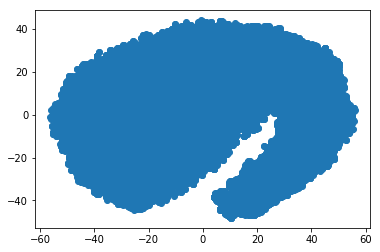

In [12]:
import matplotlib
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()